In [1]:
import mmcv
import matplotlib.pyplot as plt 
from mmagic.apis import MMagicInferencer

A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'


In [2]:
import cv2
import numpy as np
import mmcv
from mmengine import Config
from PIL import Image

from mmagic.registry import MODELS
from mmagic.utils import register_all_modules
from mmengine.runner import load_checkpoint

register_all_modules()

#cfg = Config.fromfile('configs/controlnet/controlnet-1xb1-fill50k_lora_inference.py')
#checkpoint_file = '/data/controlnet-1xb1-fill50k_lora/iter_10000.pth'
cfg = Config.fromfile('configs/controlnet/controlnet-seg.py')
controlnet = MODELS.build(cfg.model)
#ckpt = load_checkpoint(controlnet, checkpoint_file, map_location='cpu')
controlnet.to('cuda:0')
controlnet.eval()


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


07/07 21:35:44 - mmengine - INFO - Creating runwayml/stable-diffusion-v1-5 by 'HuggingFace'


/work/mmagic/mmagic/models/archs/wrapper.py:129: FutureWarning: Accessing config attribute `block_out_channels` directly via 'AutoencoderKL' object attribute is deprecated. Please access 'block_out_channels' over 'AutoencoderKL's config object instead, e.g. 'unet.config.block_out_channels'.
  return getattr(self.model, name)


07/07 21:35:46 - mmengine - INFO - Enable Xformers for HuggingFace Diffusers' module 'vae'.
07/07 21:35:46 - mmengine - INFO - Enable Xformers for HuggingFace Diffusers' module 'unet'.


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/work/mmagic/mmagic/models/archs/wrapper.py:129: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  return getattr(self.model, name)


ControlStableDiffusion(
  (data_preprocessor): DataPreprocessor()
  (vae): Wrapped Module Class: <class 'diffusers.models.autoencoder_kl.AutoencoderKL'>
  Wrapped Module Name: AutoencoderKL
  From Pretrained: runwayml/stable-diffusion-v1-5
  AutoencoderKL(
    (model): AutoencoderKL(
      (encoder): Encoder(
        (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (down_blocks): ModuleList(
          (0): DownEncoderBlock2D(
            (resnets): ModuleList(
              (0): ResnetBlock2D(
                (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
                (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
                (dropout): Dropout(p=0.0, inplace=False)
                (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
                (nonlinearity): SiLU()
              )
              (1): ResnetBlock2

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.40it/s]


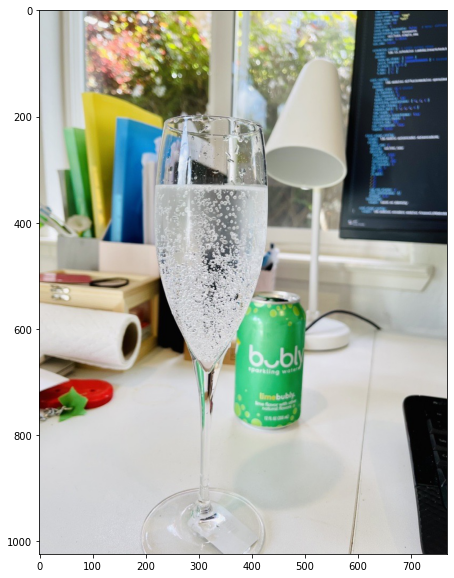

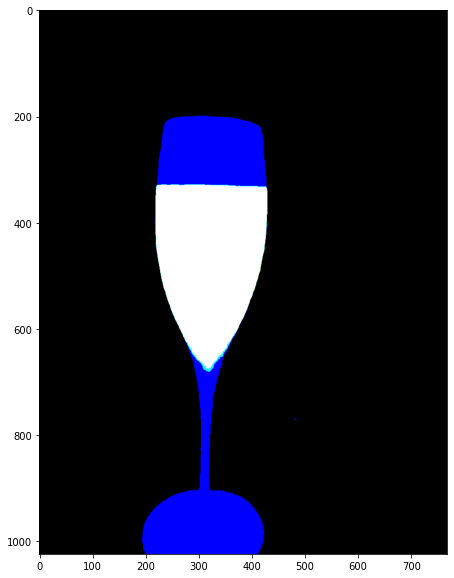

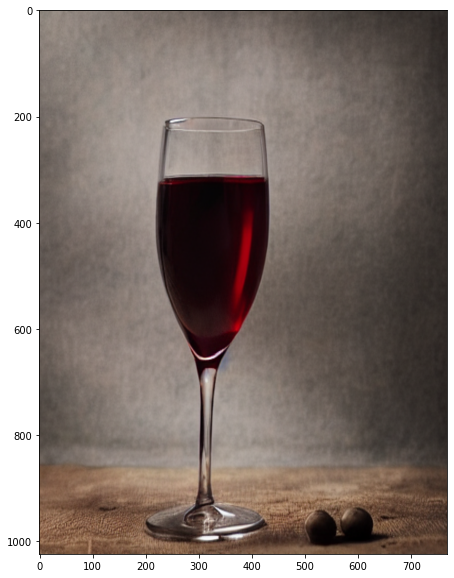

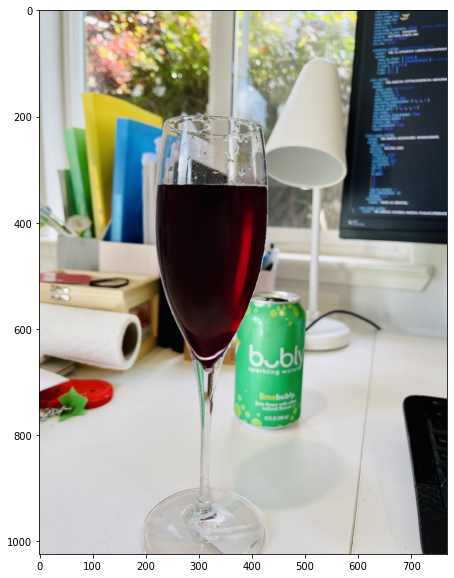

In [3]:
prompt = 'red wine in a glass'
control_url = 'data/bubly_mask.png'
original_url = 'data/bubly.png'

control = Image.open(control_url)

save_prompt = '_'.join(prompt.split(' '))
output_dict = controlnet.infer(prompt, control=control)
sample = output_dict['samples'][0]
sample = sample.resize(control.size)
sample.save('data/'+save_prompt+'_sample.png')

original = Image.open(original_url)

composed_img = Image.composite(sample, original, control.convert('L'))

plt.figure(figsize=(10,10))
plt.imshow(original)

plt.figure(figsize=(10,10))
plt.imshow(control)

plt.figure(figsize=(10,10))
plt.imshow(sample)

plt.figure(figsize=(10,10))
plt.imshow(composed_img)

#control = output_dict['controls'][0]
#control.save('/data/controlnet-1xb1-fill50k_lora/'+save_prompt+'_control.png')
#plt.figure(1)
#plt.imshow(control)


In [42]:
composed_img.save('data/final_red_wine_in_a_glass.png')